# Algerian Forest Fire Prediction

## Understanding the Problem Statement
#### Life cycle of Machine learning Project
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

## 1) Problem statement.
- This dataset comprises the forest fire in Sidi-Bel Abbes Region and Bejaia Region
- If user can predict the Temperaure based on the weather conditions, Humidity, Rain etc.
- Prediction results can be used to give outcomes based Temperature in that particular condition.

## 2) Data Collection.
- The Dataset is collected from UCI Machine Learning Website.
- The data consists of 14 column and 244 rows.

### 2.1 Import Data and Required Packages
- Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

##### Download and Import the CSV Data as Pandas DataFrame

In [2]:
data=pd.read_csv("data_sets/Algerian_forest_fires_dataset_UPDATE.csv",skiprows=1)

In [3]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


##### The Data is divided into two Different Regions Sidi-Bel Abbes Region and Bejaia Region. We need to concatenate the rows and droping the irrelevent rows. We will create separate Column for both the regions for more understanding.

In [4]:
data[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire


#### we know the index from where the Data of next region is starting. we will create separate column for Region and Region data will be populated based on the Rows and Index

In [5]:
data["region"]="Sidi-Bel Abbe"
data.loc[:121,'region']='Bejaia'

#### Regions has been populated. Now we need to remove the irrelevant data/rows as shown at index 122 and 123

In [6]:
data[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,Bejaia
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,Bejaia
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sidi-Bel Abbe
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Sidi-Bel Abbe
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi-Bel Abbe
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi-Bel Abbe
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi-Bel Abbe
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,Sidi-Bel Abbe
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,Sidi-Bel Abbe
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,Sidi-Bel Abbe


In [7]:
data.drop(index=[122,123],inplace=True)

In [8]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbe
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbe
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbe
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbe


#### Show Top 5 Records

In [9]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


#### Shape of the dataset

In [10]:
data.shape

(244, 15)

#### Summary of the dataset

In [11]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,2
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,Bejaia
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,122


#### DataTypes in Data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 30.5+ KB


#### Converting the Datatypes and removing extra spaces from column name

In [13]:
data[["Temperature"," RH"," Ws","Rain ","FFMC","DMC","DC","ISI","BUI","FWI"]]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [14]:
data.columns=data.columns.str.replace(' ','')

In [15]:
col=["Temperature","RH","Ws","Rain","FFMC","DMC","DC","ISI","BUI","FWI"]

In [16]:
data["DC"]=data["DC"].str.replace(' ','')

#### Combining day,Month,Year column to form a date column

In [17]:
data['date']=data['day']+'/'+data['month']+'/'+data['year']

In [18]:
data[col]=data[col].apply(pd.to_numeric,errors="coerce")

In [19]:
data['date']=pd.to_datetime(data['date'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          244 non-null    object        
 1   month        244 non-null    object        
 2   year         244 non-null    object        
 3   Temperature  244 non-null    int64         
 4   RH           244 non-null    int64         
 5   Ws           244 non-null    int64         
 6   Rain         244 non-null    float64       
 7   FFMC         244 non-null    float64       
 8   DMC          244 non-null    float64       
 9   DC           244 non-null    float64       
 10  ISI          244 non-null    float64       
 11  BUI          244 non-null    float64       
 12  FWI          243 non-null    float64       
 13  Classes      243 non-null    object        
 14  region       244 non-null    object        
 15  date         244 non-null    datetime64[ns]
dtypes: datet

In [21]:
data.drop(['day','month','year'],axis=1,inplace=True)

## Exploring the Data

In [22]:
numeric_feat=[fea for fea in data.columns if (data[fea].dtypes!='O') and data[fea].dtypes!="datetime64[ns]"]
category_feat=[fea for fea in data.columns if data[fea].dtypes=='O']

In [23]:
print('We have {} numerical features : {}'.format(len(numeric_feat), numeric_feat))
print('\nWe have {} categorical features : {}'.format(len(category_feat), category_feat))

We have 10 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

We have 2 categorical features : ['Classes', 'region']


#### Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [24]:
data['Classes']=data['Classes'].str.strip()

In [25]:
for i in category_feat:
    print(data[i].value_counts())
    print("--------------------")

fire        137
not fire    106
Name: Classes, dtype: int64
--------------------
Bejaia           122
Sidi-Bel Abbe    122
Name: region, dtype: int64
--------------------


### Univariate Analysis
- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Feature

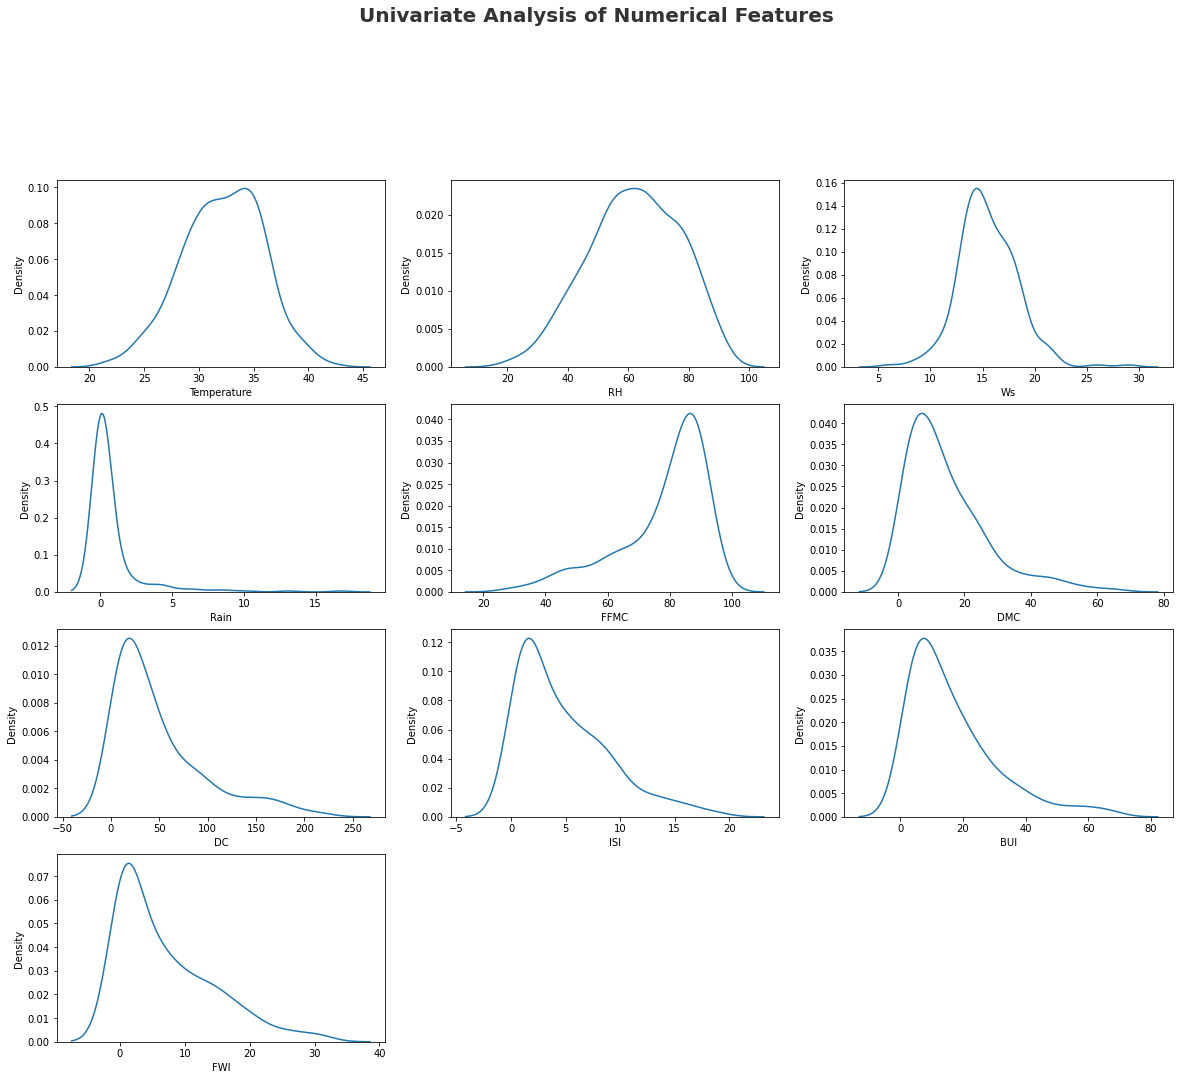

In [26]:
plt.figure(figsize=(20, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(numeric_feat)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=data[numeric_feat[i]])

### Report:
- Rain. DMC, FFMC, DC are having outliers
- RH, Temperature, WS looks Normally distributed
- BUI ISI, DC, DMC are Right Skewed
- FFMC is left skewed

### Categorical Variables

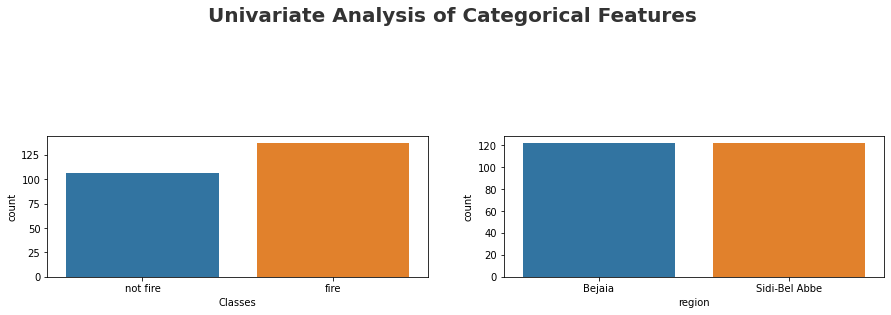

In [27]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(category_feat)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=data[category_feat[i]])

### Multivariate Analysis

In [29]:
data[numeric_feat].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.566670
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.580957
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032368
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324422
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.691132
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875864
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739521
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.922895
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


<AxesSubplot:>

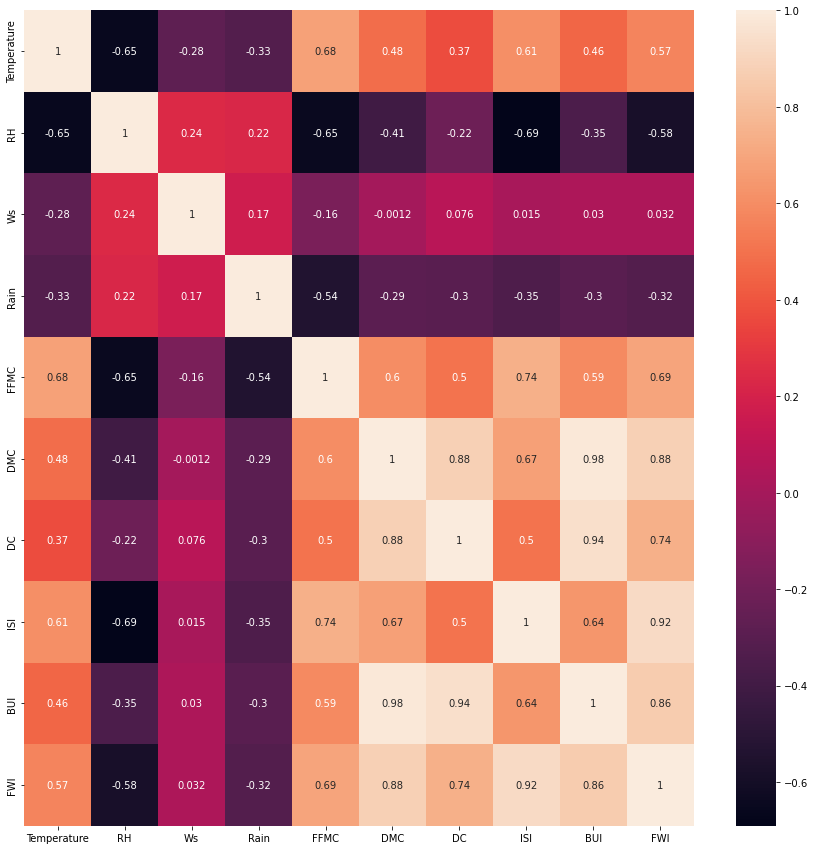

In [34]:
plt.figure(figsize=(15, 15))
sns.heatmap(data[numeric_feat].corr(),annot=True)

In [36]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in category_feat:
    if chi2_contingency(pd.crosstab(data['Classes'], data[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[category_feat, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Classes,Reject Null Hypothesis
1,region,Reject Null Hypothesis


### Checking Null Values

In [44]:
data.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
region         0
date           0
dtype: int64

#### Fire Weather Index (FWI) - is having 1 null value so replacing the null value with mean. We can't delete the column or drop the row beacuse of it's strong correlation with other columns and also the data is very less.

In [49]:
data['FWI'].fillna(data.FWI.mean(),inplace=True)

In [51]:
data.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
date           0
dtype: int64

#### Classes - is having 1 null value so replacing the null value with mode or the max frequency. We can't delete the column or drop the row beacuse, it's a dependent variable and also the data is very less.

In [57]:
data.loc[data['Classes'].isnull()]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
167,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,7.035391,NaN,Sidi-Bel Abbe,2012-07-14


In [62]:
classes_mode=data['Classes'].mode()

In [65]:
data['Classes'].fillna(classes_mode[0],inplace=True)

In [67]:
data.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

### Encoding the Categorical variables

#### Label Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['region_cat']=le.fit_transform(data['region'])
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date,region_cat
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,2012-01-06,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,2012-02-06,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,2012-03-06,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,2012-04-06,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,2012-05-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbe,2012-09-26,1
242,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,Sidi-Bel Abbe,2012-09-27,1
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbe,2012-09-28,1
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbe,2012-09-29,1


#### One Hot Encoding

In [73]:
data=pd.get_dummies(data,columns=["Classes"])

In [79]:
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,date,region_cat,Classes_fire,Classes_not fire
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Bejaia,2012-01-06,0,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Bejaia,2012-02-06,0,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Bejaia,2012-03-06,0,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Bejaia,2012-04-06,0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Bejaia,2012-05-06,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,Sidi-Bel Abbe,2012-09-26,1,1,0
242,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,Sidi-Bel Abbe,2012-09-27,1,0,1
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,Sidi-Bel Abbe,2012-09-28,1,0,1
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,Sidi-Bel Abbe,2012-09-29,1,0,1


In [85]:
def classes(a):
    if a==1:
        return "Fire"
    else:
        return "Not Fire"

In [86]:
data['Classes']=data['Classes_fire'].apply(classes)

In [87]:
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,date,region_cat,Classes_fire,Classes_not fire,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Bejaia,2012-01-06,0,0,1,Not Fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Bejaia,2012-02-06,0,0,1,Not Fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Bejaia,2012-03-06,0,0,1,Not Fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Bejaia,2012-04-06,0,0,1,Not Fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Bejaia,2012-05-06,0,0,1,Not Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,Sidi-Bel Abbe,2012-09-26,1,1,0,Fire
242,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,Sidi-Bel Abbe,2012-09-27,1,0,1,Not Fire
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,Sidi-Bel Abbe,2012-09-28,1,0,1,Not Fire
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,Sidi-Bel Abbe,2012-09-29,1,0,1,Not Fire


In [88]:
for i in category_feat:
    print(data[i].value_counts())
    print("--------------------")

Fire        138
Not Fire    106
Name: Classes, dtype: int64
--------------------
Bejaia           122
Sidi-Bel Abbe    122
Name: region, dtype: int64
--------------------


### Visualization

#### Temperature is Normally Distributed

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

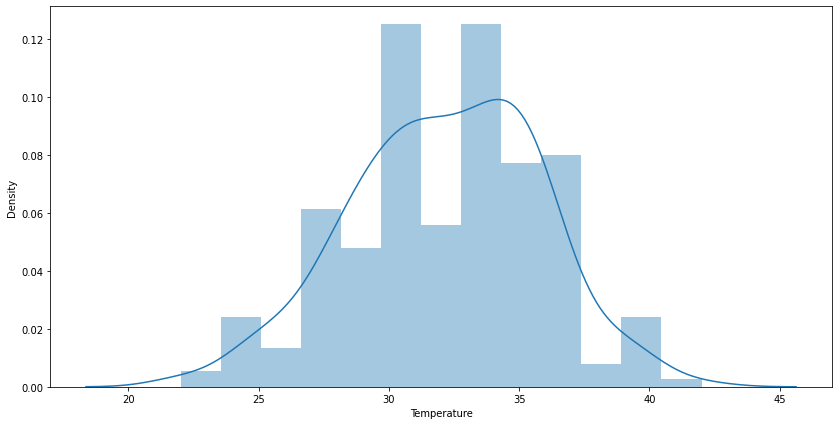

In [152]:
plt.subplots(figsize=(14,7))
sns.distplot(data['Temperature'])

Text(0, 0.5, 'Fine Fuel Moisture Code')

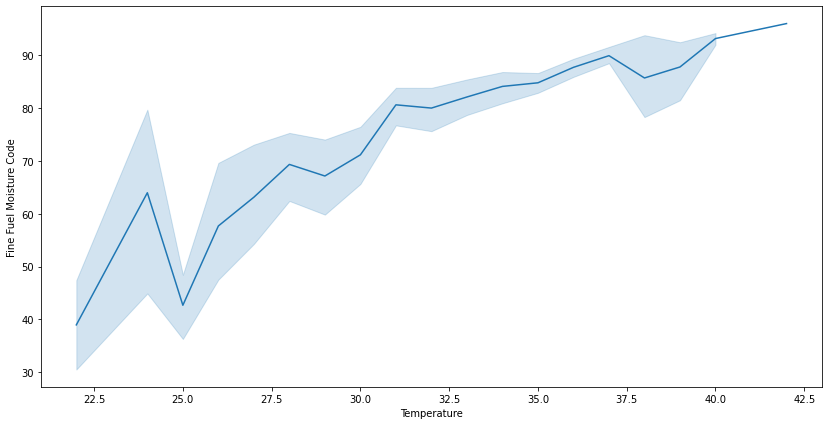

In [166]:
plt.subplots(figsize=(14,7))
sns.lineplot(x=data['Temperature'],y=data['FFMC'])
plt.xlabel("Temperature")
plt.ylabel("Fine Fuel Moisture Code")

Text(0, 0.5, 'No. of Firemor Not')

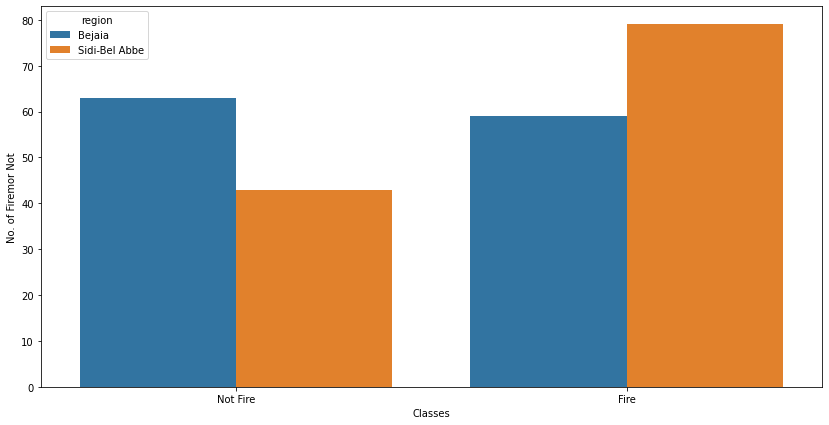

In [170]:
plt.subplots(figsize=(14,7))
sns.countplot(x=data['Classes'],hue=data['region'])
plt.xlabel("Classes")
plt.ylabel("No. of Firemor Not")

#### Here, If the temperature is increasing, the Initial Spread Index is increasing

Text(0, 0.5, 'Initial Spread Index')

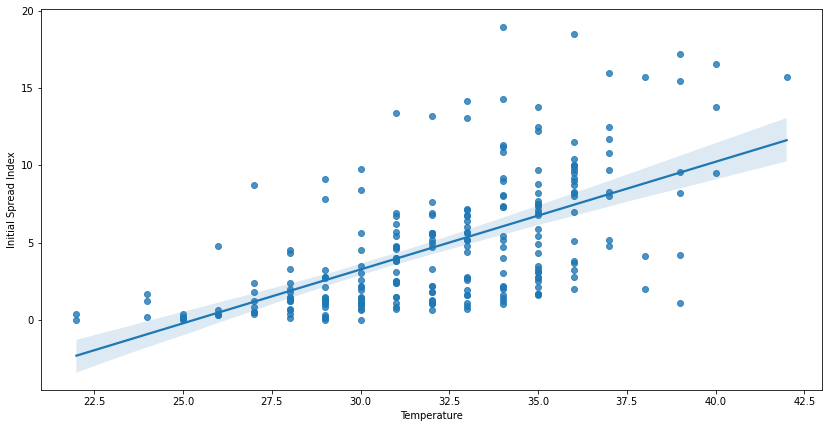

In [154]:
plt.subplots(figsize=(14,7))
sns.regplot(x=data['Temperature'],y=data['ISI'])
plt.xlabel("Temperature")
plt.ylabel("Initial Spread Index")

#### Max And Min Temperature At the time of fire and Not Fire

In [112]:
max_temp= data.groupby('Classes').Temperature.max()
max_temp =max_temp.to_frame().sort_values('Temperature',ascending=False)
max_temp

,Temperature
Classes,
Fire,42
Not Fire,39


In [113]:
min_temp= data.groupby('Classes').Temperature.min()
min_temp =min_temp.to_frame().sort_values('Temperature',ascending=False)
min_temp

,Temperature
Classes,
Fire,26
Not Fire,22


#### Here, If the rain mm is going down the Temperature is increasing

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

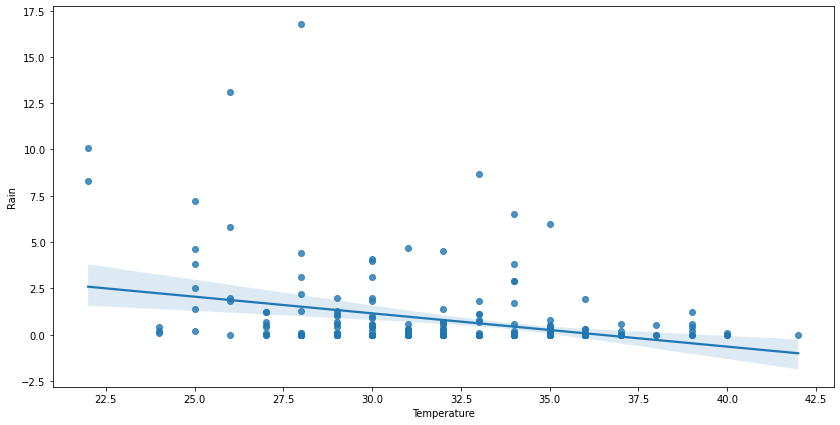

In [155]:
plt.subplots(figsize=(14,7))
sns.regplot(x=data["Temperature"],y=data["Rain"])

#### if the wind Speed is going down the Temperature is going high 

Text(0, 0.5, 'Wind Speed Km/Hr')

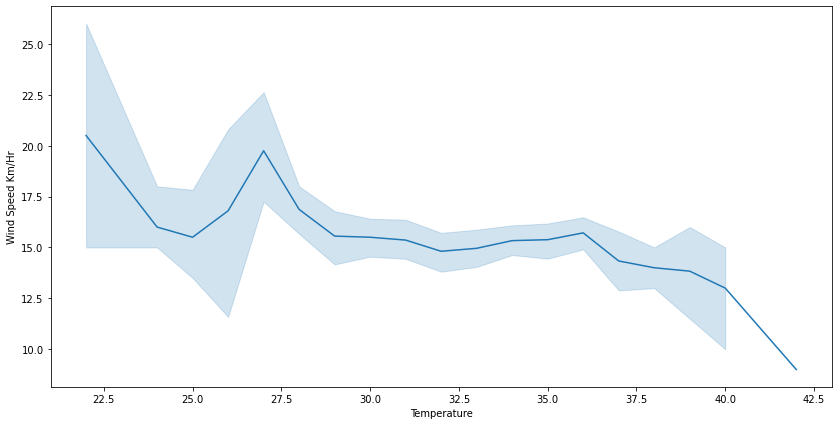

In [156]:
plt.subplots(figsize=(14,7))
sns.lineplot(x=data["Temperature"],y=data["Ws"])
plt.xlabel("Temperature")
plt.ylabel("Wind Speed Km/Hr")

#### Temperature VS Date with Respect to Fire

<AxesSubplot:xlabel='date', ylabel='Temperature'>

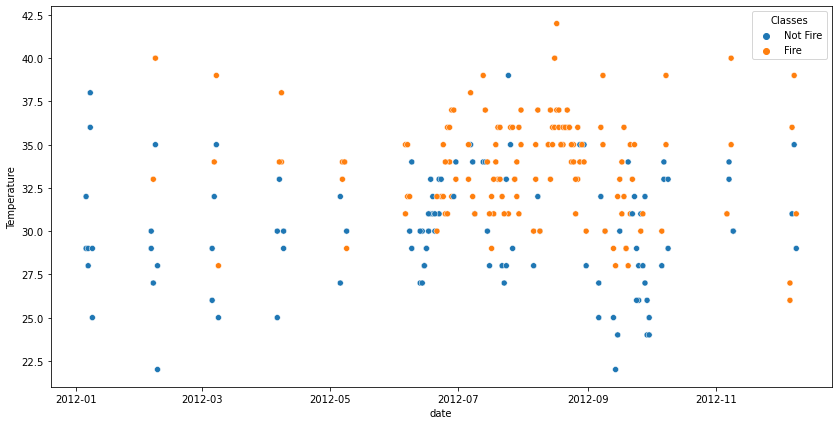

In [157]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x=data["date"], y=data["Temperature"],color='b', hue=data['Classes'])

<AxesSubplot:xlabel='Temperature'>

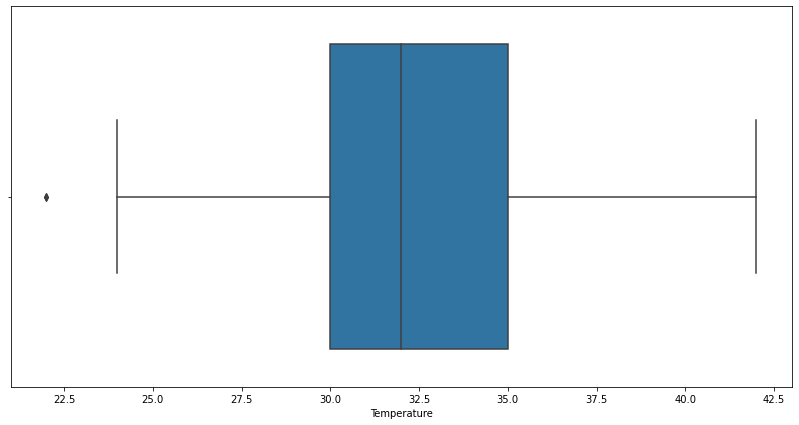

In [158]:
## Checking the Temperature
plt.subplots(figsize=(14,7))
sns.boxplot(data['Temperature'])

## Train Test and Splitting the data
- used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications

In [159]:
from sklearn.model_selection import train_test_split

In [162]:
X=data.iloc[:,1:10]

In [172]:
y=data['Temperature']

In [173]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [171]:
from sklearn.preprocessing import StandardScaler

In [174]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [175]:
X_test=scaler.transform(X_test)

In [177]:
X_train

array([[ 0.46820243, -0.79034424,  0.00333488, ..., -0.84667549,
        -0.74826664, -0.84545892],
       [ 1.32761054,  1.95867921, -0.43761068, ..., -0.06622043,
         2.82942503,  0.81088154],
       [ 0.40209411, -0.10308838, -0.43761068, ...,  0.1229808 ,
         0.46212998,  0.27615746],
       ...,
       [-0.72174726, -0.79034424, -0.43761068, ...,  0.5250334 ,
         0.05420626,  0.36745181],
       [ 0.13766085, -0.44671631, -0.43761068, ..., -0.5865238 ,
        -0.76164119, -0.78024866],
       [ 1.12928559, -1.13397218, -0.43761068, ..., -0.79937518,
        -0.293532  , -0.79329072]])

In [178]:
X_test

array([[-3.91205683e-01, -1.03088380e-01,  1.38916380e+00,
        -1.79797624e-01, -6.05979086e-01, -8.16430403e-01,
        -7.28424722e-01, -6.81393900e-01, -8.06332766e-01],
       [ 1.37660847e-01,  5.84167484e-01, -4.37610682e-01,
         6.68107054e-01,  1.28591060e+00,  1.94334844e+00,
         5.01383250e-01,  1.61902841e+00,  1.13693281e+00],
       [-1.11839716e+00, -4.46716311e-01, -4.37610682e-01,
         9.37200143e-02, -7.81436597e-01, -8.02246518e-01,
        -6.33824109e-01, -8.21826657e-01, -7.93290716e-01],
       [ 7.15525305e-02, -4.46716311e-01, -2.48634012e-01,
        -5.67146867e-02, -7.12779310e-01, -8.06299056e-01,
        -7.04774569e-01, -7.68328464e-01, -8.06332766e-01],
       [-1.92880734e-01,  5.84167484e-01, -4.37610682e-01,
         6.81782936e-01, -1.85778541e-02,  1.46047535e-01,
         5.25033404e-01,  6.08935318e-02,  3.80493862e-01],
       [-5.89530632e-01,  2.40539552e-01, -4.37610682e-01,
         8.25379696e-01,  1.72074008e+00,  2.263499

## Model Selection

### Linear Model
- It is statistical approach to predict the dependent varible based on Independent Variable.
- The expectation of linear model is a straight line passing through the data points with minimal cost function.

In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [181]:
linear_pred=linear.predict(X_test)

In [183]:
linear_pred

array([31.47606103, 33.21711638, 33.38602134, 31.84846156, 33.09614035,
       34.67927497, 33.87959103, 33.45526713, 32.1530754 , 33.16123875,
       33.61710015, 27.86423126, 35.02576084, 29.18426567, 31.43577363,
       32.04651165, 33.85937472, 28.14203296, 36.12114424, 34.16401828,
       32.82777968, 33.90268269, 33.71607825, 32.90272415, 36.05458866,
       29.07028586, 32.29867371, 32.92843224, 27.7194929 , 32.25691051,
       26.01659465, 26.95909596, 34.11436162, 31.67160578, 33.05337268,
       30.6915586 , 29.15642019, 32.52562563, 27.86941443, 35.34699034,
       32.76270317, 33.93823586, 33.99503447, 31.37910346, 36.23723303,
       34.14150518, 24.20995139, 34.93500843, 33.76804233, 29.99162968,
       31.44044002, 32.63764804, 35.29569408, 32.29452222, 30.63337422,
       30.43364661, 32.47062457, 35.92852249, 31.08008521, 33.56510384,
       32.36975897, 32.77511142, 31.03747682, 24.24334037, 31.61156145,
       36.28934065, 29.86922714, 29.9928721 , 34.56607728, 33.50

### Assumptions

#### Linearity Between Actual and the predicted value

<AxesSubplot:xlabel='Temperature'>

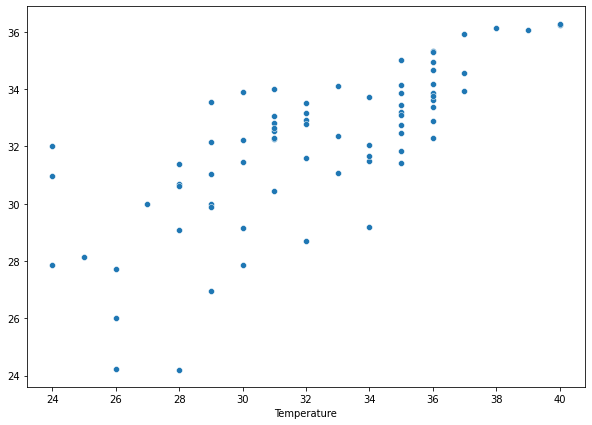

In [198]:
plt.subplots(figsize=(10,7))
sns.scatterplot(y_test,linear_pred)

<AxesSubplot:xlabel='Temperature'>

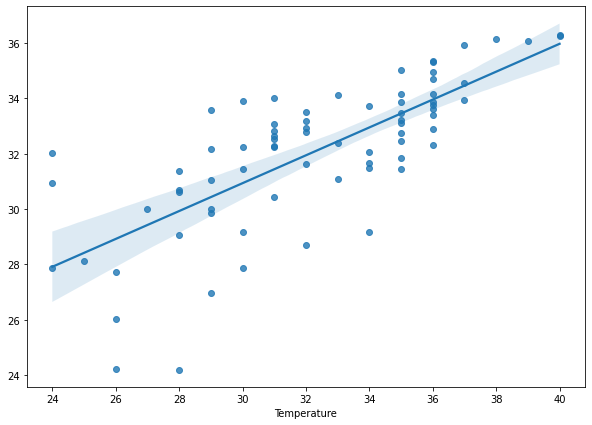

In [199]:
plt.subplots(figsize=(10,7))
sns.regplot(y_test,linear_pred)

#### Normal Distribution of Residuals 

In [201]:
residuals_linear=y_test-linear_pred

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

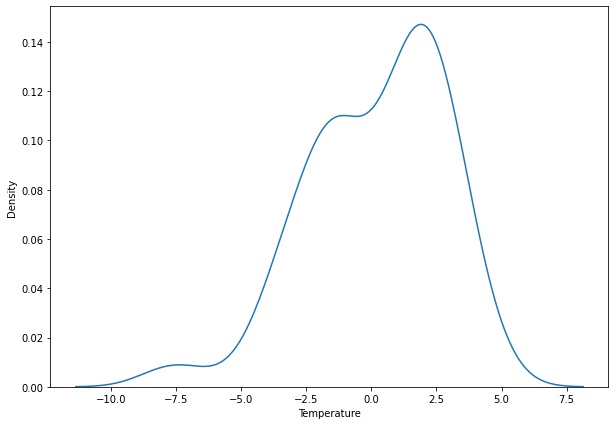

In [202]:
plt.subplots(figsize=(10,7))
sns.distplot(residuals_linear,hist=False)

#### Homoskedasticity- Data Should be Uniformly distributed there should be no shape

<AxesSubplot:ylabel='Temperature'>

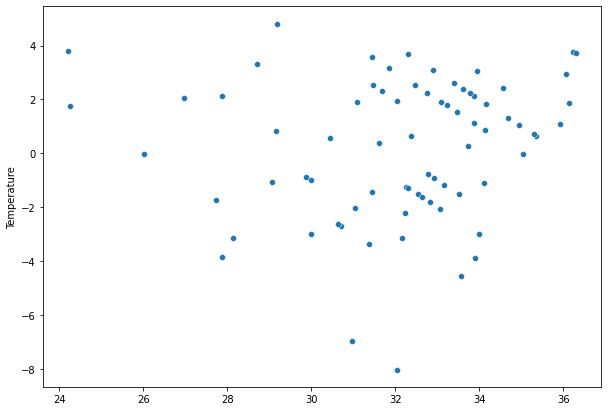

In [203]:
plt.subplots(figsize=(10,7))
sns.scatterplot(linear_pred,residuals_linear)

### Performance Metrics

In [205]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [207]:
print(mean_absolute_error(y_test,linear_pred)," - Mean Absolute Error")
print(mean_squared_error(y_test,linear_pred)," - Mean Squared Error")
print(np.sqrt(mean_squared_error(y_test,linear_pred))," - Root Mean Squared Error")

2.194346488437217  - Mean Absolute Error
6.784263475031862  - Mean Squared Error
2.604661873455336  - Root Mean Squared Error


#### R2 Squared and Adjusted R Squared

In [208]:
from sklearn.metrics import r2_score

In [211]:
print(r2_score(y_test,linear_pred),"- R2 Score")

0.5465066736334458 - R2 Score


In [213]:
print(1 - (1-r2_score(y_test,linear_pred))*(len(y)-1)/(len(y)-X.shape[1]-1),"- Adjusted R Squared")

0.5290646226193476 - Adjusted R Squared


### Ridge Regression
- It is used to remove overfitting also performs as L2 Regularization. The main idea of Ridge Regression is to fit a new line that doesn't fit the training data.

In [214]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)

Ridge()

In [215]:
ridge_pred=ridge_reg.predict(X_test)

### Assumptions
#### Linearity Between Actual and the predicted value

<AxesSubplot:xlabel='Temperature'>

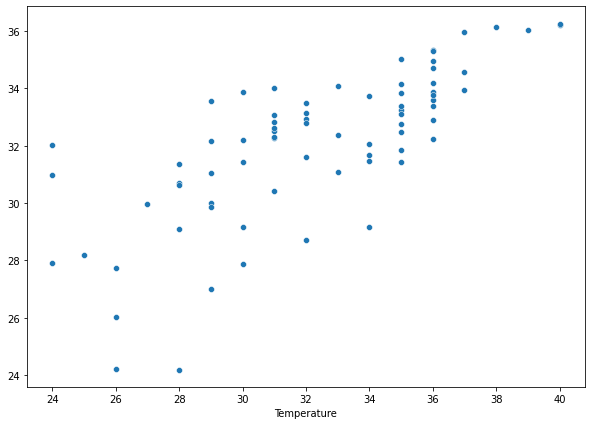

In [218]:
plt.subplots(figsize=(10,7))
sns.scatterplot(y_test,ridge_pred)

<AxesSubplot:xlabel='Temperature'>

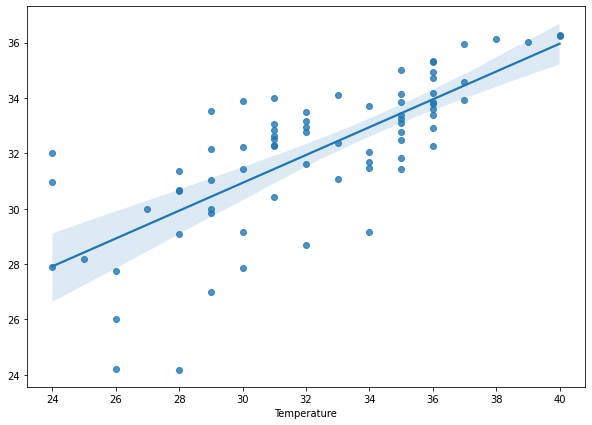

In [220]:
plt.subplots(figsize=(10,7))
sns.regplot(y_test,ridge_pred)

#### Normal Distribution of Residuals

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

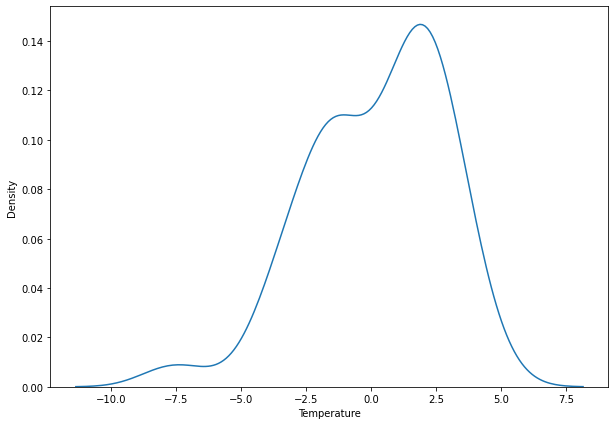

In [224]:
residuals_ridge=y_test-ridge_pred
plt.subplots(figsize=(10,7))
sns.distplot(residuals_ridge,hist=False)

#### Homoskedasticity- Data Should be Uniformly distributed there should be no shape

<AxesSubplot:ylabel='Temperature'>

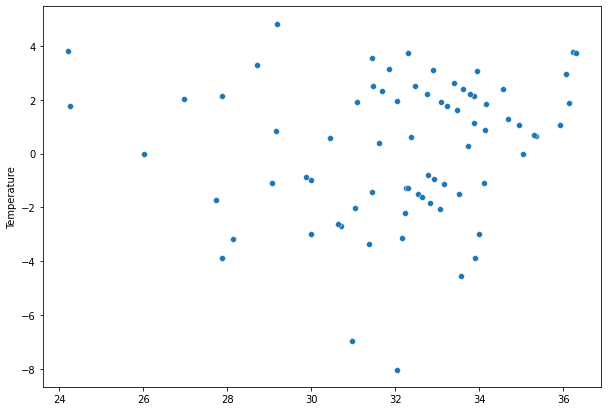

In [226]:
plt.subplots(figsize=(10,7))
sns.scatterplot(linear_pred,residuals_ridge)

### Performance Metrics

In [228]:
print(mean_absolute_error(y_test,ridge_pred)," - Mean Absolute Error")
print(mean_squared_error(y_test,ridge_pred)," - Mean Squared Error")
print(np.sqrt(mean_squared_error(y_test,ridge_pred))," - Root Mean Squared Error")

2.1950215771162718  - Mean Absolute Error
6.795007875960644  - Mean Squared Error
2.6067235902490014  - Root Mean Squared Error


#### R2 Squared and Adjusted R Squared

In [231]:
print(r2_score(y_test,ridge_pred),"- R2 Score")
print(1 - (1-r2_score(y_test,ridge_pred))*(len(y)-1)/(len(y)-X.shape[1]-1),"- Adjusted R Squared")

0.5457884653658953 - R2 Score
0.5283187909568913 - Adjusted R Squared


### Lasso Regression
- This performs L1 regularization and used to help in feature selection. here we need to find absolute of Slope. λ- lambda is a hyperameter where if the lambda increases the slope decreases. when the slope is 0 the feature will be removed.

In [232]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [233]:
lasso_pred=lasso_reg.predict(X_test)

In [235]:
lasso_pred

array([32.16610216, 32.72386046, 32.86349603, 32.02459106, 32.92829129,
       33.30299639, 33.28212734, 32.6560559 , 32.18915933, 32.74805139,
       33.14694741, 30.23204106, 33.94348911, 30.87804378, 32.92641576,
       32.4117625 , 32.8614245 , 29.25483028, 34.2879847 , 33.44513267,
       32.4979354 , 33.04654923, 33.26821464, 32.84180581, 34.3572356 ,
       30.3140709 , 32.35122689, 32.69685624, 29.34557541, 32.02709176,
       29.39094797, 28.45610046, 33.17446022, 32.54444173, 32.68907871,
       31.78870036, 30.20816272, 32.52877009, 29.09545942, 33.54916532,
       32.64796579, 33.21287644, 33.79865613, 31.95690309, 33.93414865,
       33.18505104, 29.70034922, 33.68766713, 33.19896374, 30.68244482,
       31.75911602, 32.44623166, 33.8022906 , 32.28955751, 31.72527204,
       31.23281759, 32.33461748, 34.1213449 , 31.76024979, 33.39280375,
       32.28228857, 32.33918972, 31.2521237 , 29.24849911, 32.17368369,
       34.29130658, 31.34661988, 31.32594684, 33.30299639, 32.99

### Assumptions
#### Linearity Between Actual and the predicted value

<AxesSubplot:xlabel='Temperature'>

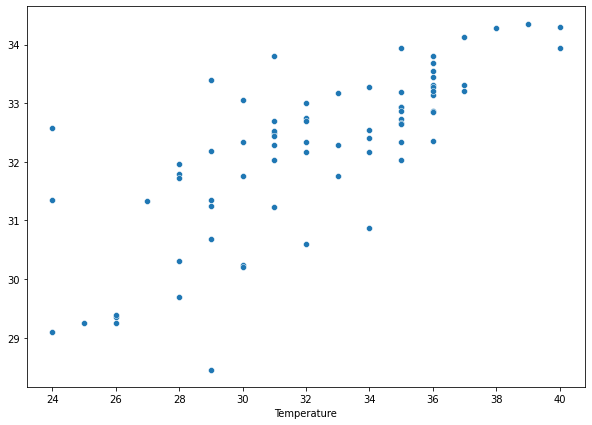

In [236]:
plt.subplots(figsize=(10,7))
sns.scatterplot(y_test,lasso_pred)

<AxesSubplot:xlabel='Temperature'>

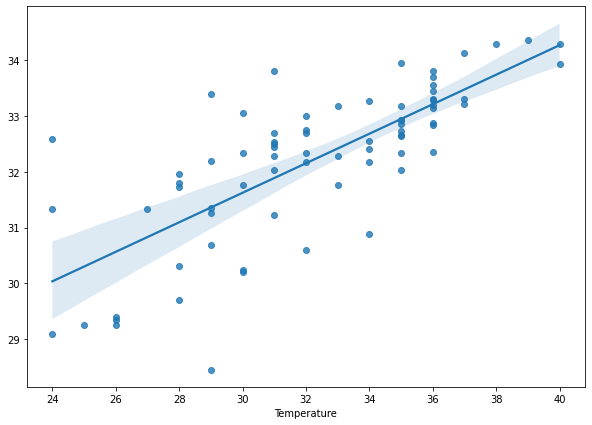

In [238]:
plt.subplots(figsize=(10,7))
sns.regplot(y_test,lasso_pred)

#### Normal Distribution in Residuals

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

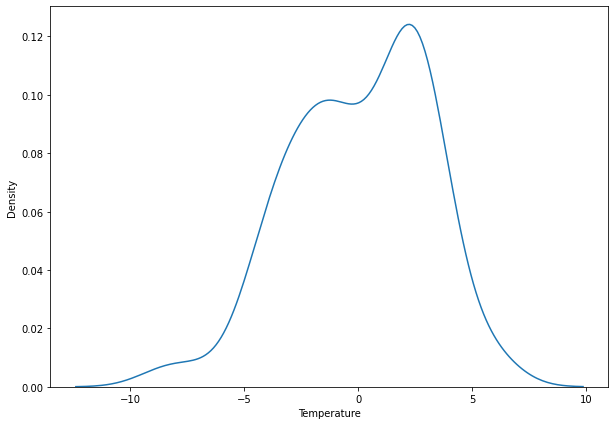

In [240]:
residuals_lasso=y_test-lasso_pred
plt.subplots(figsize=(10,7))
sns.distplot(residuals_lasso,hist=False)

#### Homoskedasticity- Data Should be Uniformly distributed there should be no shape

<AxesSubplot:ylabel='Temperature'>

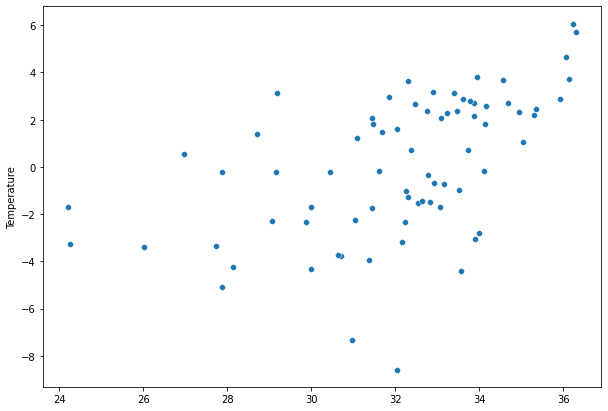

In [242]:
plt.subplots(figsize=(10,7))
sns.scatterplot(linear_pred,residuals_lasso)

### Performance Metrics

In [255]:
print(mean_absolute_error(y_test,lasso_pred)," - Mean Absolute Error")
print(mean_squared_error(y_test,lasso_pred)," - Mean Squared Error")
print(np.sqrt(mean_squared_error(y_test,lasso_pred))," - Root Mean Squared Error")

2.5214631986737737  - Mean Absolute Error
8.901708219482833  - Mean Squared Error
2.9835730625347243  - Root Mean Squared Error


#### R2 Squared and Adjusted R Squared

In [245]:
print(r2_score(y_test,lasso_pred),"- R2 Score")
print(1 - (1-r2_score(y_test,lasso_pred))*(len(y)-1)/(len(y)-X.shape[1]-1),"- Adjusted R Squared")

0.40496631864982124 - R2 Score
0.3820804078286605 - Adjusted R Squared


### Elastic Net Model
- It is combination of both Ridge and Lasso Regression to regularize regression models.
- It uses Both L1 and L2 Regularization

In [246]:
from sklearn.linear_model import ElasticNet
elastic_reg=ElasticNet()
elastic_reg.fit(X_train,y_train)

ElasticNet()

In [247]:
elastic_pred=elastic_reg.predict(X_test)
elastic_pred

array([31.73042459, 32.85598388, 32.67658442, 31.7934263 , 32.89990539,
       33.83614245, 33.44540303, 32.43861464, 31.99709797, 32.70410688,
       33.31711748, 29.82461893, 34.04882507, 30.31195761, 32.14109279,
       32.26624609, 32.80747022, 29.42893505, 35.0732405 , 33.80178843,
       32.38432786, 33.30307668, 33.44148623, 32.84701111, 35.10104125,
       30.16150067, 32.02040401, 32.4701027 , 29.34674593, 32.01215168,
       28.80838828, 28.76349509, 33.23071816, 31.98318914, 32.65156417,
       31.36880256, 30.11244414, 32.31653691, 29.28952504, 33.92455161,
       32.77626894, 33.47193426, 34.10582462, 31.63652786, 34.4650768 ,
       33.35588888, 28.18039553, 33.90469631, 33.36924133, 30.52556487,
       31.50804851, 32.34891772, 34.46387323, 32.06920108, 31.43361258,
       30.95942425, 32.26787296, 34.74003234, 31.48137467, 33.40330052,
       32.07163331, 32.38776954, 31.18803232, 28.0447574 , 31.83809781,
       34.83325334, 30.95238396, 30.92506105, 33.70921988, 32.90

### Assumptions
#### Linearity Between Actual and the predicted value

<AxesSubplot:xlabel='Temperature'>

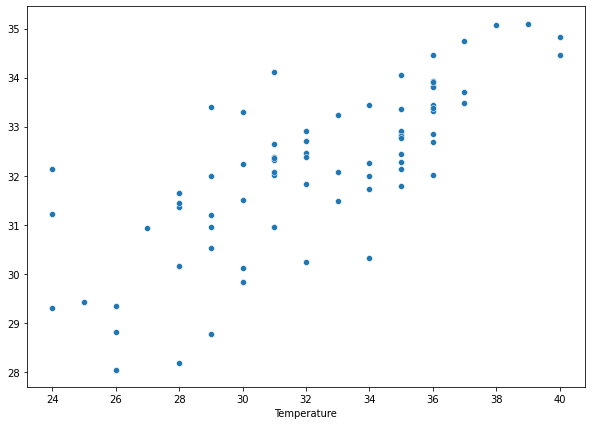

In [249]:
plt.subplots(figsize=(10,7))
sns.scatterplot(y_test,elastic_pred)

<AxesSubplot:xlabel='Temperature'>

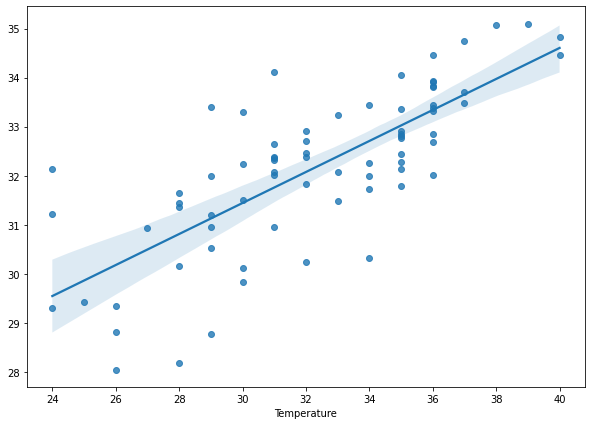

In [251]:
plt.subplots(figsize=(10,7))
sns.regplot(y_test,elastic_pred)

#### Normal Distribution of Residuals

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

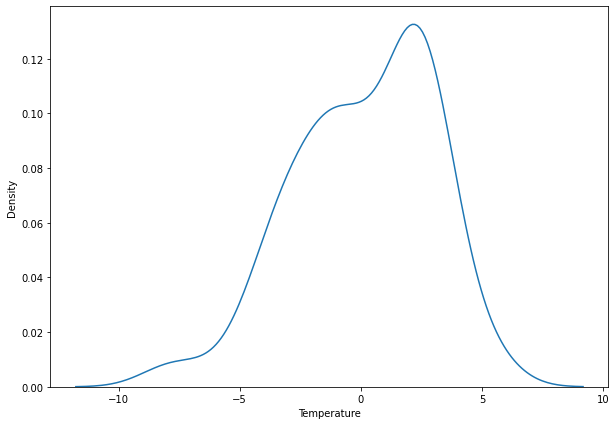

In [252]:
residuals_elastic=y_test-elastic_pred
plt.subplots(figsize=(10,7))
sns.distplot(residuals_elastic,hist=False)

#### Homoskedasticity- Data Should be Uniformly distributed there should be no shape

<AxesSubplot:ylabel='Temperature'>

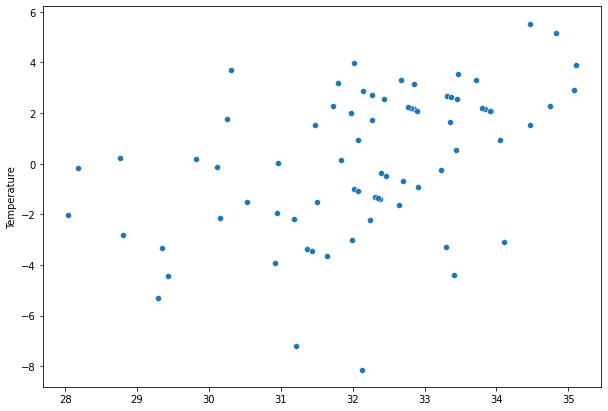

In [254]:
plt.subplots(figsize=(10,7))
sns.scatterplot(elastic_pred,residuals_elastic)

### Performannce Metrics

In [257]:
print(mean_absolute_error(y_test,elastic_pred)," - Mean Absolute Error")
print(mean_squared_error(y_test,elastic_pred)," - Mean Squared Error")
print(np.sqrt(mean_squared_error(y_test,elastic_pred))," - Root Mean Squared Error")

2.3849511673687465  - Mean Absolute Error
8.103712440069064  - Mean Squared Error
2.8467020286761775  - Root Mean Squared Error


#### R2 Squared and Adjusted R Squared

In [258]:
print(r2_score(y_test,elastic_pred),"- R2 Score")
print(1 - (1-r2_score(y_test,elastic_pred))*(len(y)-1)/(len(y)-X.shape[1]-1),"- Adjusted R Squared")

0.458308256468815 - R2 Score
0.4374739586406925 - Adjusted R Squared
